In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('datasets/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
x = dataset.iloc[:,:13].values
y = dataset.iloc[:,-1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

n , d = X_train.shape

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)

In [6]:
def model_with_optimizers(optimizer):
    model = Sequential()
    model.add(Dense(15, input_shape=(d,), activation='sigmoid'))
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    hist = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val),epochs=100, verbose=0)
    return hist

In [7]:
def model_with_regularizer(regularizer):
    model = Sequential()
    model.add(Dense(15, input_shape=(d,), activation='sigmoid', kernel_regularizer=regularizer))
    model.add(Dense(5, activation='sigmoid', kernel_regularizer=regularizer))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizer))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    hist = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val),epochs=100, verbose=0)
    return hist


In [8]:
def plots(hist):
    plt.plot(hist.history['loss'],label='loss')
    plt.plot(hist.history['val_loss'],label='val_loss')
    plt.title("loss Vs Validation loss")
    plt.legend()
    plt.show()

    plt.plot(hist.history['accuracy'],label='acc')
    plt.plot(hist.history['val_accuracy'],label='val_acc')
    plt.title("Accuracy")
    plt.legend()
    plt.show()

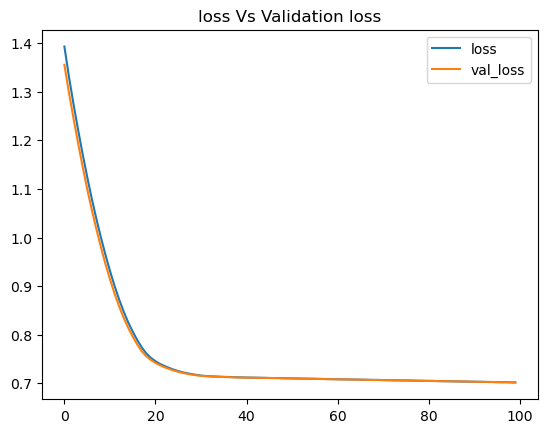

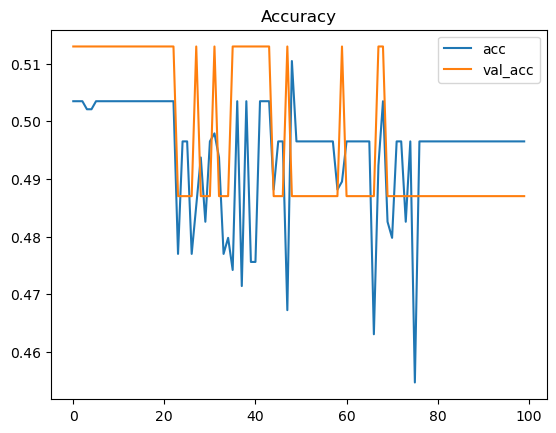

In [9]:
hist = model_with_regularizer('l1')
plots(hist)

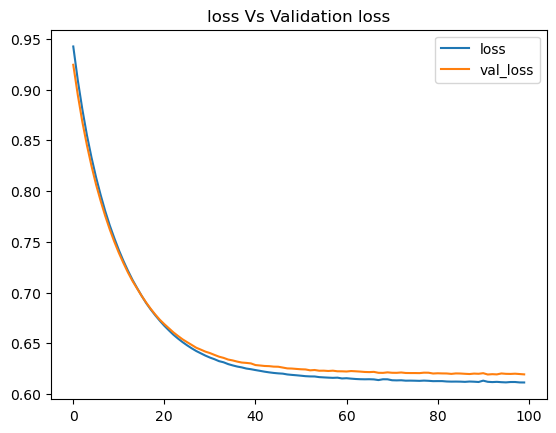

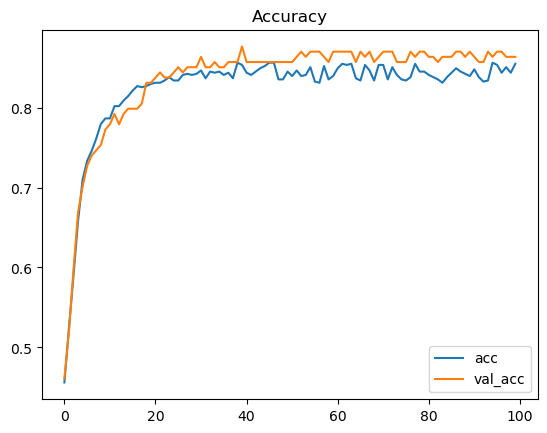

In [10]:
hist = model_with_regularizer('l2')
plots(hist)

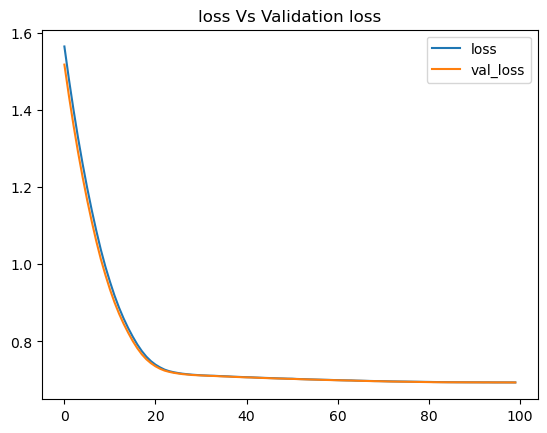

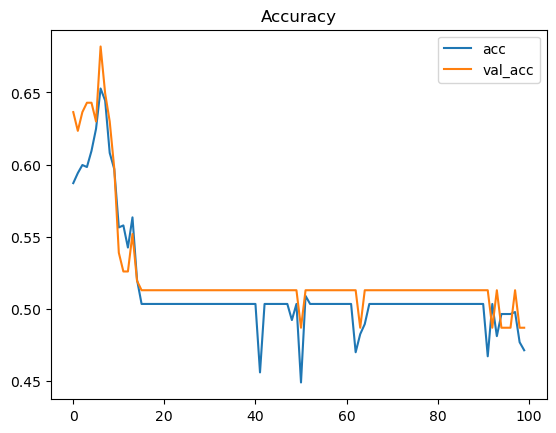

In [11]:
hist = model_with_regularizer('l1_l2')
plots(hist)